# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data

t: time  
f: failures  
cum_f: cumulative failures

In [2]:
data = np.loadtxt('J3.csv', delimiter=',', skiprows=1, dtype=int)

In [3]:
t = data[:, 0]
# f = data[:, 1]
cum_f = data[:, 2]

# Laplace Trend

Calculation of Laplace Trend Values

In [4]:
def laplace_trend(t, cum_f):
    laplace = -((np.sum(cum_f) - ((t + 1) / 2) * cum_f[-1])
                / np.sqrt(((t**2 - 1) / 12) * cum_f[-1]))
    return laplace

laplace_trend_values = []
for i in range(len(t)):
    laplace_trend_values.append(laplace_trend(t[i], cum_f[:i+1]))

laplace_trend_values = np.array(laplace_trend_values)
laplace_trend_values = np.nan_to_num(laplace_trend_values, nan=0.0)

print("Laplace Trend Values:", laplace_trend_values)

Laplace Trend Values: [ 0.          2.          2.4196774   1.27279221  3.85871817  4.96429075
  2.87890522  1.27841845 -0.32363773 -0.96922337 -1.31618039 -1.1667568
 -1.57729573 -2.44506522 -1.84078005 -0.73967611  0.58742695  0.48186942
  1.42888082  1.22306674  1.14152305  1.64009468  1.23389657  0.40466167
 -0.34599579 -1.02758028 -1.45731636 -1.84680934 -2.77235879 -3.43903379
 -4.25149666 -4.9115899  -5.72657961 -6.29171761 -6.1198334  -6.74758755
 -7.4399285  -8.09580837 -8.71803444 -9.20552897 -9.66728662]


/tmp/ipykernel_77342/3811906286.py:2: RuntimeWarning: invalid value encountered in scalar divide
  laplace = -((np.sum(cum_f) - ((t + 1) / 2) * cum_f[-1])


# Visualization of Laplace Trend and SRGMs

Prepare SRGM Functions

In [5]:
# Goel-Okumoto Model
def goel_okumoto(t, a, b):
    return a * (1 - np.exp(-b * t))


# Delayed S-Shaped Model
def delayed_s(t, a, b):
    return a * (1 - (1 + b * t) * np.exp(-b * t))


# Inflection S-Shaped Model
def inflection_s(t, a, b, c):
    return a * (1 - np.exp(-b * t)) / (1 + c * np.exp(-b * t))


# Weibull Model
def weibull(t, a, b, c):
    return a * (1 - np.exp(-b * t**c))


# Log-Logistic Model
def log_logistic(t, a, b, c):
    return a * (b * t)**c / (1 + (b * t)**c)

Setting of Optimal Parameters

In [6]:
# Goel-Okumoto parameters
go_a = 514.3248887931373
go_b = 0.03244197822494742

# Delayed S-Shaped parameters
dss_a = 377.3729056059647
dss_b = 0.11824307578769665

# Inflection S-Shaped parameters
iss_a = 367.52423343296255
iss_b = 0.1282812008719672
iss_c = 4.166830899408718

# Weibull parameters
we_a = 373.1031760944183
we_b = 0.013624776446566973
we_c = 1.4840967297681757

# Log-Logistic parameters
ll_a = 460.3132651704542
ll_b = 0.05681144850762876
ll_c = 1.6399212262694682

Prepare SRGM Graph Data

In [7]:
goel_okumoto_values = goel_okumoto(t, go_a, go_b)
delayed_s_values = delayed_s(t, dss_a, dss_b)
inflection_s_values = inflection_s(t, iss_a, iss_b, iss_c)
weibull_values = weibull(t, we_a, we_b, we_c)
log_logistic_values = log_logistic(t, ll_a, ll_b, ll_c)

goel_okumoto_values = np.insert(goel_okumoto_values, 0, 0)
delayed_s_values = np.insert(delayed_s_values, 0, 0)
inflection_s_values = np.insert(inflection_s_values, 0, 0)
weibull_values = np.insert(weibull_values, 0, 0)
log_logistic_values = np.insert(log_logistic_values, 0, 0)

Plot Laplace Trend and SRGM Graphs

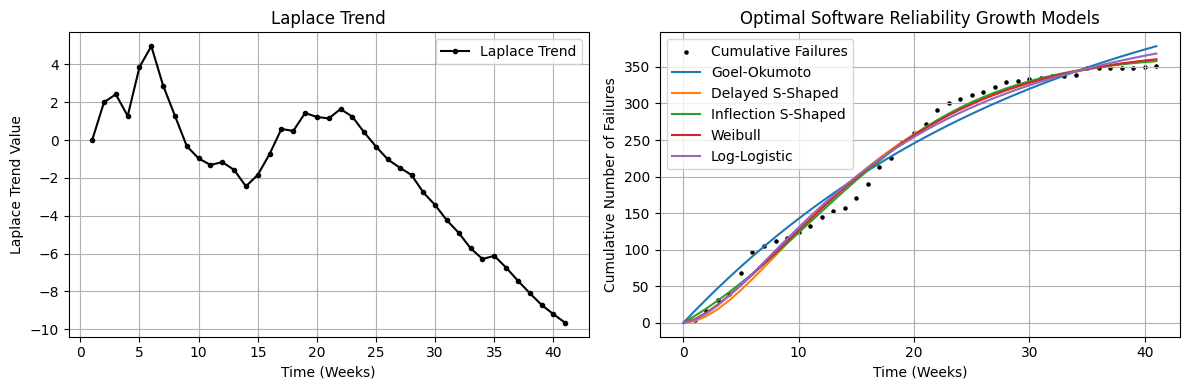

In [8]:
t_add_zero = np.insert(t, 0, 0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t, laplace_trend_values,
             label='Laplace Trend', color='black', marker='.')
axes[0].set_title('Laplace Trend')
axes[0].set_xlabel('Time (Weeks)')
axes[0].set_ylabel('Laplace Trend Value')
axes[0].legend()
axes[0].grid()

axes[1].scatter(t, cum_f, label='Cumulative Failures', color='black', s=5)
axes[1].plot(t_add_zero, goel_okumoto_values, label='Goel-Okumoto')
axes[1].plot(t_add_zero, delayed_s_values, label='Delayed S-Shaped')
axes[1].plot(t_add_zero, inflection_s_values, label='Inflection S-Shaped')
axes[1].plot(t_add_zero, weibull_values, label='Weibull')
axes[1].plot(t_add_zero, log_logistic_values, label='Log-Logistic')
axes[1].set_title('Optimal Software Reliability Growth Models')
axes[1].set_xlabel('Time (Weeks)')
axes[1].set_ylabel('Cumulative Number of Failures')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.savefig('.img/laplace_trend_and_srgms.png', dpi=300, bbox_inches='tight')